# Heart disease project

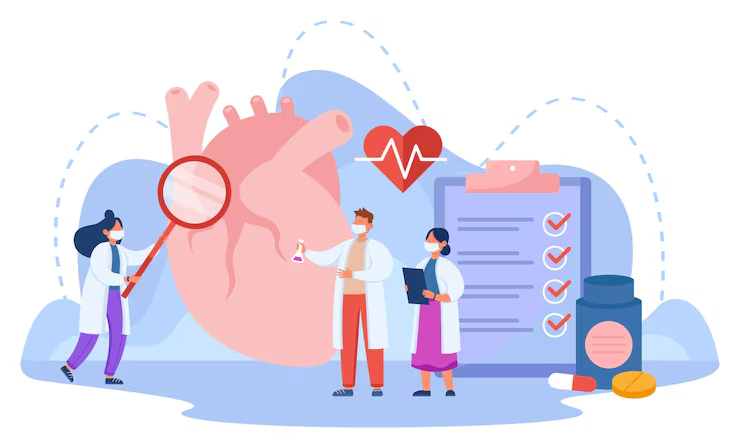

##  Data Preprocessing & Cleaning

#### 1. Load the Heart Disease UCI dataset 

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("heart_disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,H


In [4]:
#showing the shape of the data
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  num       303 non-null    object 
dtypes: float64(6), object(8)
memory usage: 33.3+ KB


In [6]:
#Showing characteristics of the data
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,298.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.674497
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.938202
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


### 2. Handle missing values

In [7]:
#check for the missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
num         0
dtype: int64

In [8]:
# Fill missing of "ca" column with mode
df["ca"].fillna(df["ca"].mode()[0],inplace=True)

C:\Users\2027\AppData\Local\Temp\ipykernel_23280\3028236104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(df["ca"].mode()[0],inplace=True)


In [9]:
#Remove the missing of thal column
df=df.dropna()

In [10]:
# Checking for missing data
print(df.isnull().sum())
print("Shape after dropping:", df.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Shape after dropping: (301, 14)


### 3. Perform data encoding

In [11]:
#categorical columns
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

# One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded = encoder.fit_transform(df[categorical_cols])

# DataFrame after encoding
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index  
)


#concat rest of cloumns
df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Encoding target col 
le = LabelEncoder()

df_final["num"] = le.fit_transform(df_final["num"])
df_final.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_male,cp_angina,cp_asympt,cp_notang,fbs_true,restecg_hyp,restecg_norm,exang_true,slope_flat,slope_up,thal_norm,thal_rev
0,63.0,145.0,233.0,150.0,2.3,0.0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,160.0,286.0,108.0,1.5,3.0,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,67.0,120.0,229.0,129.0,2.6,2.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,37.0,130.0,250.0,187.0,3.5,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### 4. Standardize numerical features 

In [12]:
# Numeric columns
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

# Scaling features
scaler=StandardScaler()

df_final[numeric_cols]=scaler.fit_transform(df_final[numeric_cols])

df_final.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_male,cp_angina,cp_asympt,cp_notang,fbs_true,restecg_hyp,restecg_norm,exang_true,slope_flat,slope_up,thal_norm,thal_rev
0,0.947829,0.760168,-0.260565,0.011339,1.082105,-0.714692,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.387592,1.614151,0.762015,-1.826496,0.393311,2.496088,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.387592,-0.663137,-0.337740,-0.907578,1.340403,1.425828,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,-1.910633,-0.093815,0.067433,1.630385,2.115297,-0.714692,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.470869,-0.093815,-0.820090,0.974015,0.307211,-0.714692,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### 5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps,and boxplots.


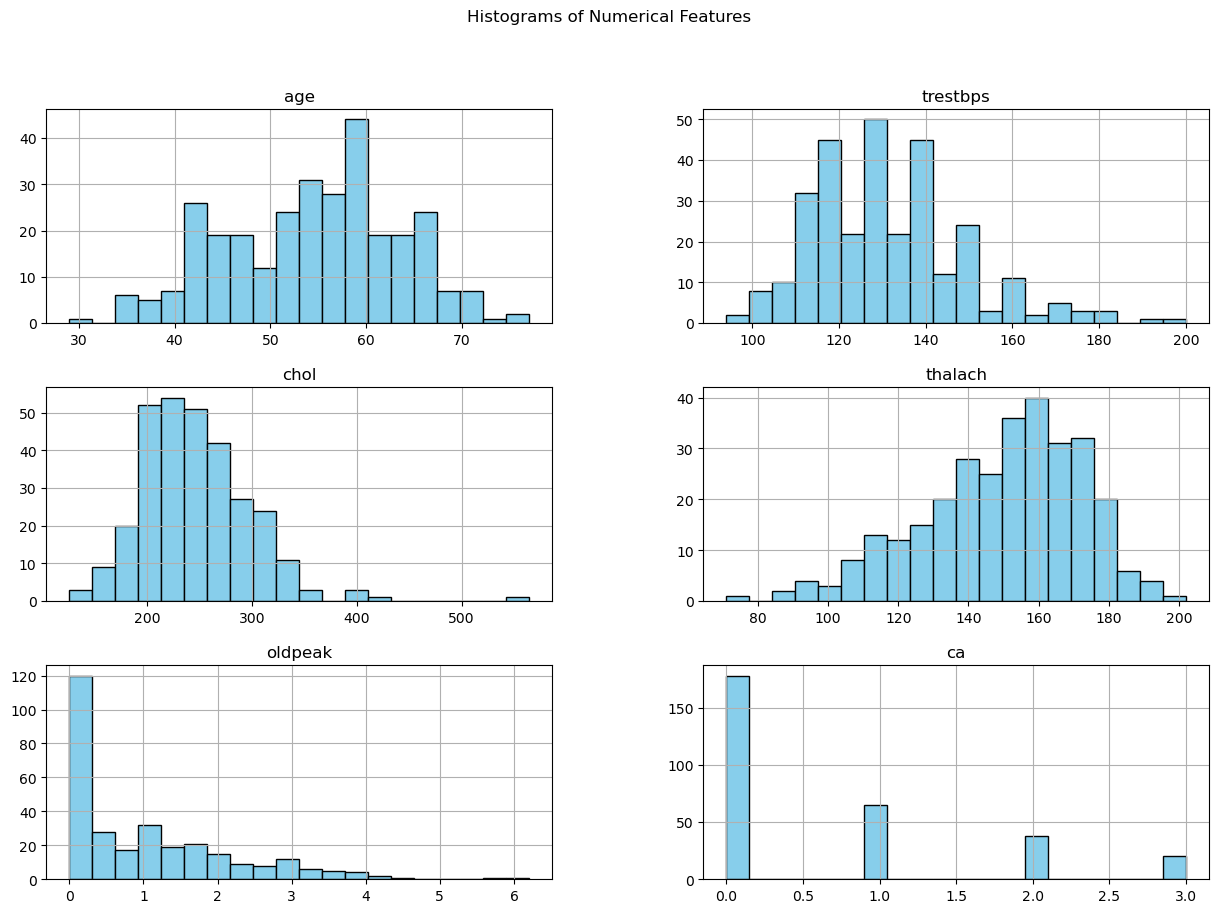

In [13]:
# Histograms for numeric features
df[numeric_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


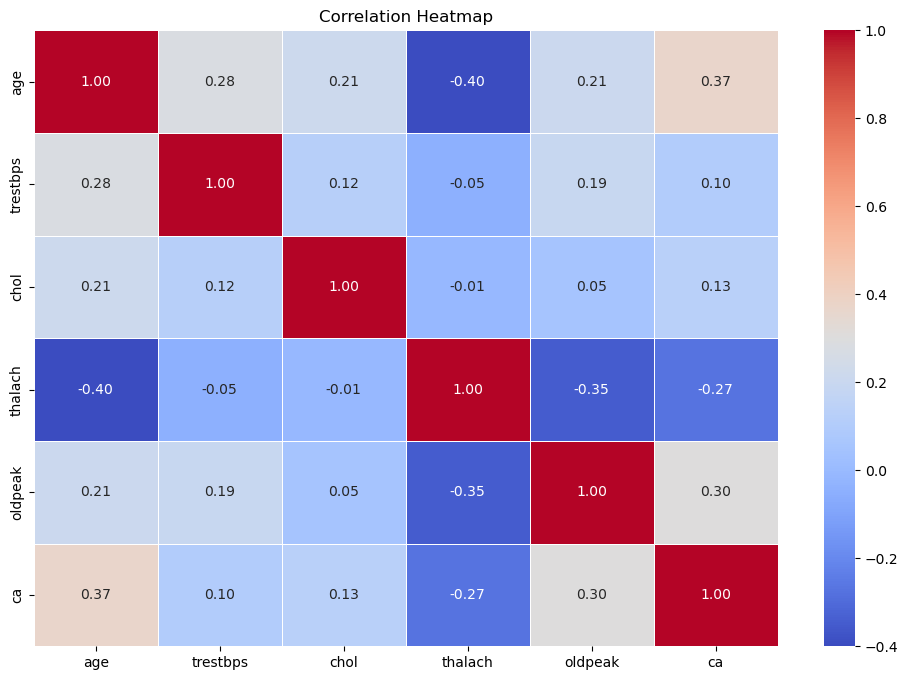

In [14]:
#correlation heatmap
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr() 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


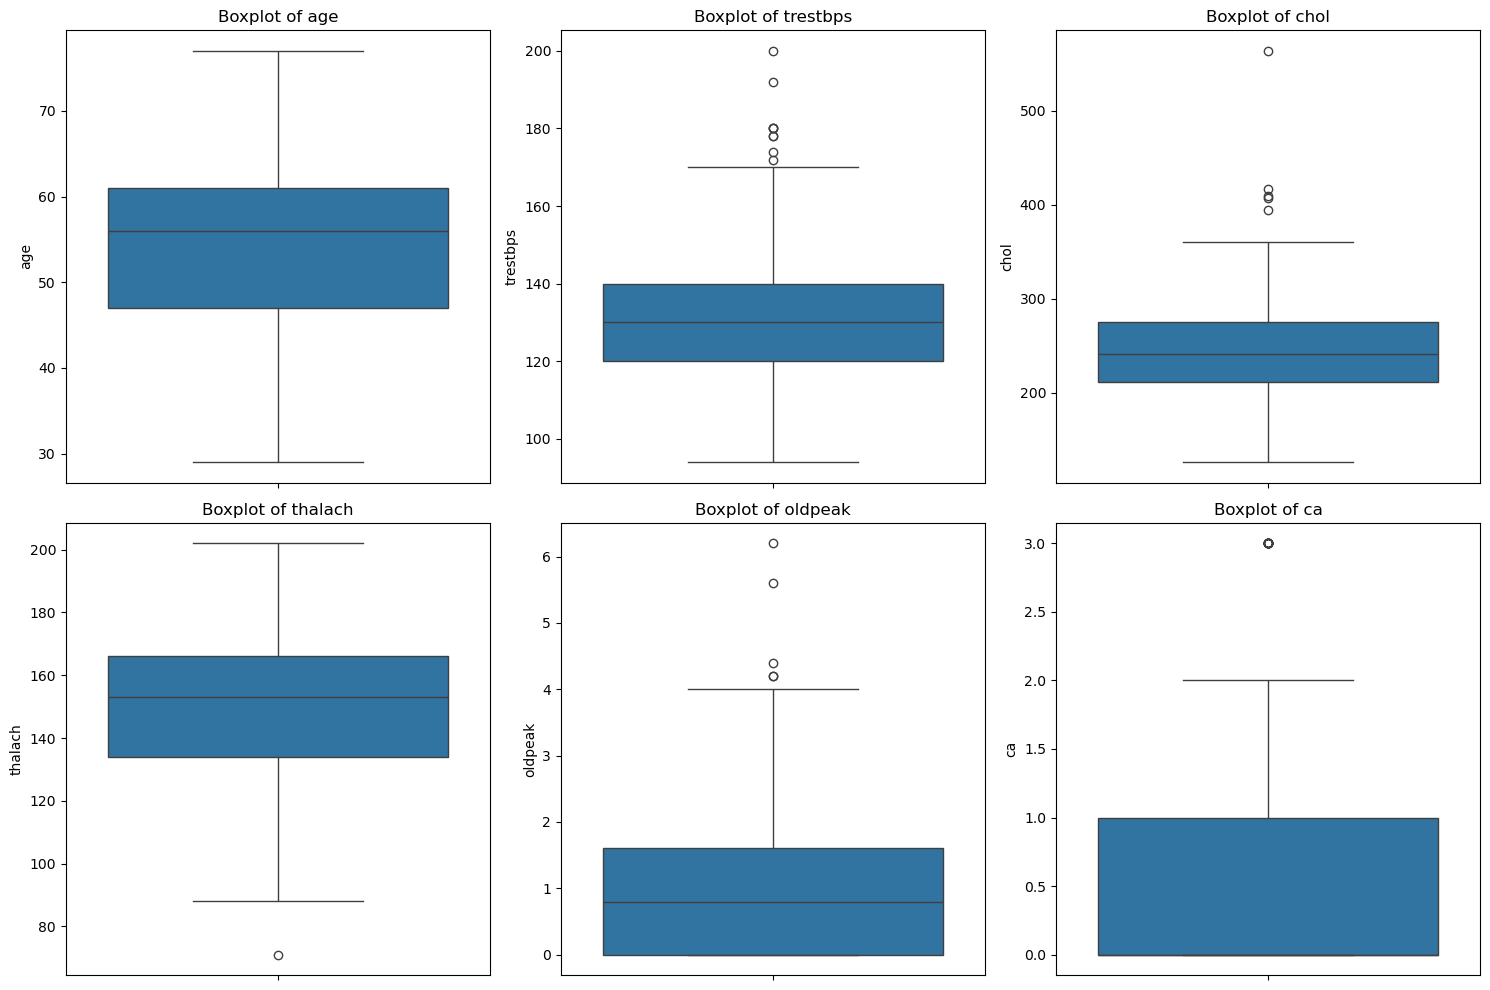

In [15]:
# Box plot of numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)   
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


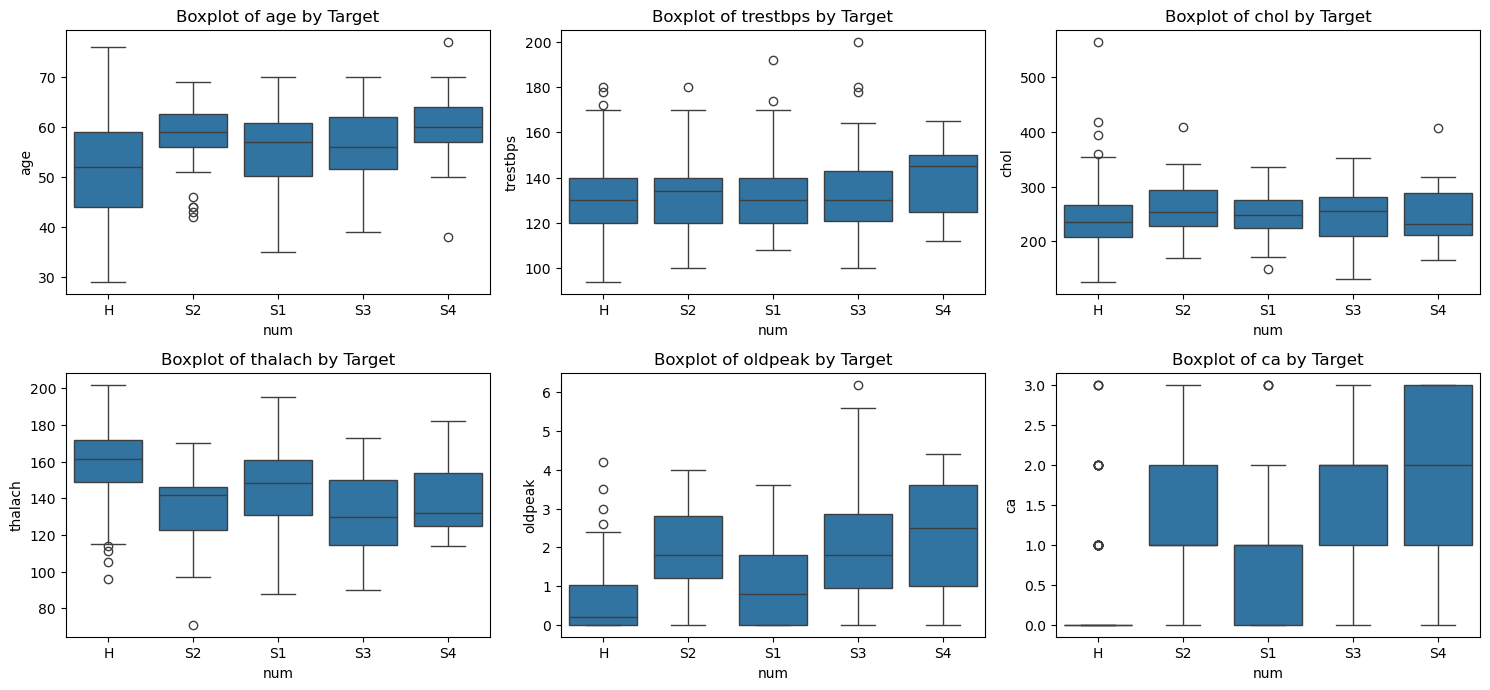

In [16]:
# boxplots of numerical features vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="num", y=col, data=df)  
    plt.title(f"Boxplot of {col} by Target")
plt.tight_layout()
plt.show()
